#📌 Extracción

In [2]:
# Reimportar librerías y volver a cargar el JSON (después del reset de estado)
import json
import pandas as pd

file_path = "/content/TelecomX_Data.json"

with open(file_path, "r", encoding="utf-8") as f:
    data_json = json.load(f)

# Verificar estructura
if isinstance(data_json, list):
    sample = data_json[:3]  # primeros registros
elif isinstance(data_json, dict):
    sample = {k: str(v)[:200] for k,v in list(data_json.items())[:5]}
else:
    sample = str(data_json)[:500]

type(data_json), sample

(list,
 [{'customerID': '0002-ORFBO',
   'Churn': 'No',
   'customer': {'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'Yes',
    'tenure': 9},
   'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'},
   'internet': {'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'Yes',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'No'},
   'account': {'Contract': 'One year',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Mailed check',
    'Charges': {'Monthly': 65.6, 'Total': '593.3'}}},
  {'customerID': '0003-MKNFE',
   'Churn': 'No',
   'customer': {'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 'No',
    'Dependents': 'No',
    'tenure': 9},
   'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'},
   'internet': {'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'No',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'St

In [3]:
from pandas import json_normalize

# Normalizar el JSON
df = json_normalize(data_json)

# Mostrar las primeras filas
print(df.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

In [4]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#🔧 Transformación

In [5]:
# Vamos a normalizar el JSON a un DataFrame y explorar columnas y tipos de datos
from pandas import json_normalize

# Normalizar los datos anidados
df = json_normalize(data_json)

# Ver las primeras filas y la información general
df_info = df.info()
df_head = df.head(3)
df_columns = df.columns.tolist()

df_info, df_head, df_columns[:20]  # mostramos solo primeras 20 columnas para no saturar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

(None,
    customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
 0  0002-ORFBO    No          Female                       0              Yes   
 1  0003-MKNFE    No            Male                       0               No   
 2  0004-TLHLJ   Yes            Male                       0               No   
 
   customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
 0                 Yes                9                Yes                  No   
 1                  No                9                Yes                 Yes   
 2                  No                4                Yes                  No   
 
   internet.InternetService  ... internet.OnlineBackup  \
 0                      DSL  ...                   Yes   
 1                      DSL  ...                    No   
 2              Fiber optic  ...                    No   
 
   internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
 0                        No 

In [7]:
#estimado del gasto promedio diario.
df["Cuentas_Diarias"] = df["account.Charges.Monthly"] / 30


#📊 Carga y análisis

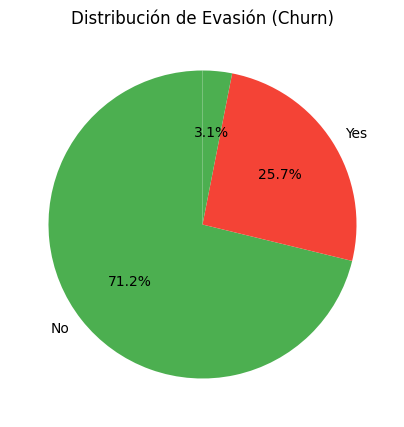

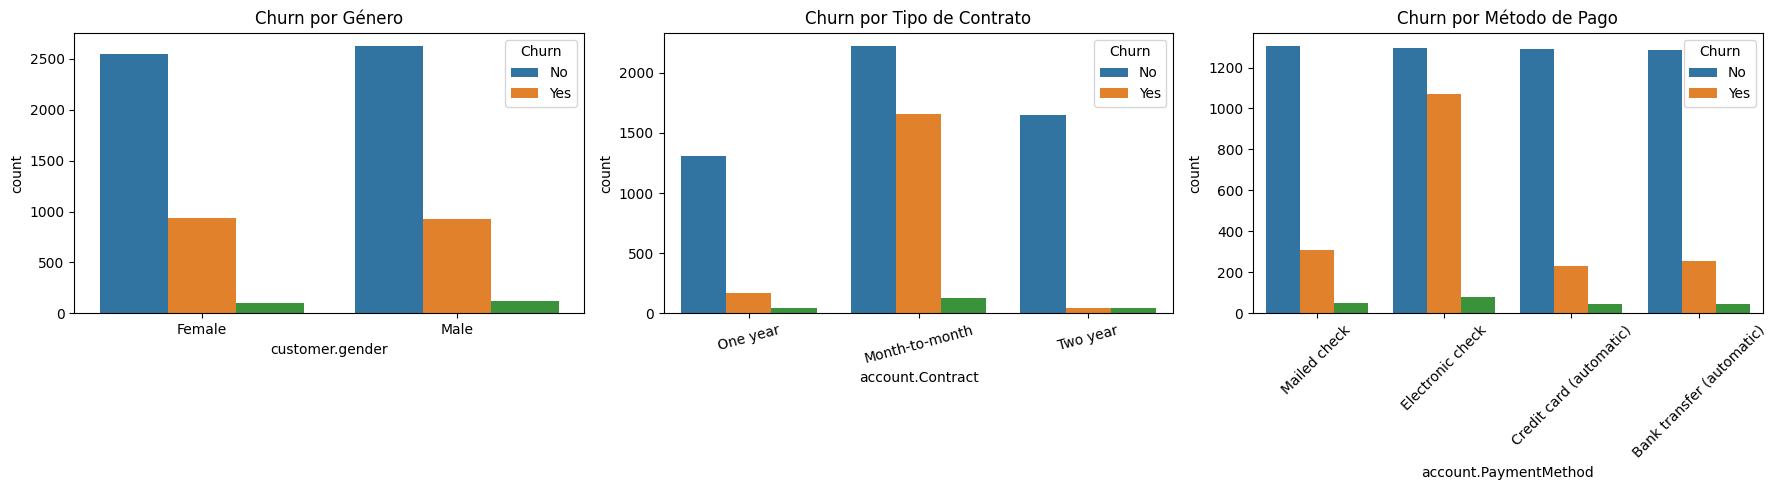

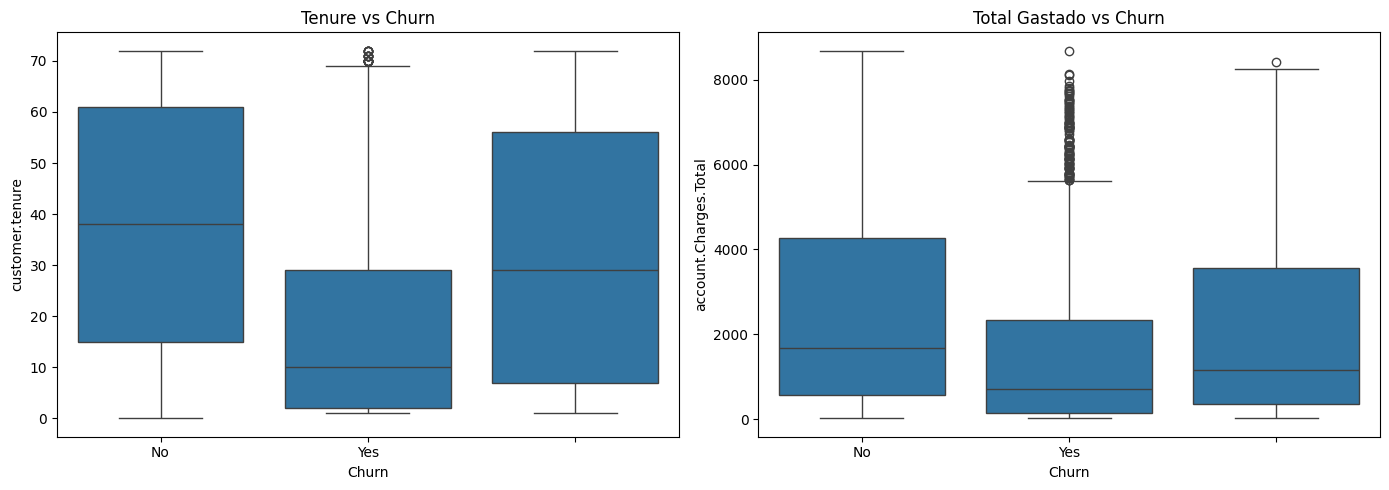

,count,mean,std,min,25%,50%,75%,max
customer.tenure,7267.0,32.346498,24.571773,0.00,9.000,29.0,55.000,72.00
account.Charges.Monthly,7267.0,64.720098,30.129572,18.25,35.425,70.3,89.875,118.75
account.Charges.Total,7256.0,2280.634213,2268.632997,18.80,400.225,1391.0,3785.300,8684.80


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copiamos df para limpieza mínima antes de análisis
df_clean = df.copy()

# Convertir Charges.Total a numérico (puede tener errores como espacios o valores nulos)
df_clean["account.Charges.Total"] = pd.to_numeric(df_clean["account.Charges.Total"], errors="coerce")

# 1. Análisis descriptivo de variables numéricas
desc_stats = df_clean[["customer.tenure", "account.Charges.Monthly", "account.Charges.Total"]].describe().T

# 2. Distribución de churn
churn_counts = df_clean["Churn"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(churn_counts, labels=churn_counts.index, autopct="%1.1f%%", startangle=90, colors=["#4CAF50", "#F44336"])
plt.title("Distribución de Evasión (Churn)")
plt.show()

# 3. Recuento de evasión por variables categóricas (ejemplo: género, contrato, método de pago)
fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.countplot(data=df_clean, x="customer.gender", hue="Churn", ax=axes[0])
axes[0].set_title("Churn por Género")

sns.countplot(data=df_clean, x="account.Contract", hue="Churn", ax=axes[1])
axes[1].set_title("Churn por Tipo de Contrato")
axes[1].tick_params(axis='x', rotation=15)

sns.countplot(data=df_clean, x="account.PaymentMethod", hue="Churn", ax=axes[2])
axes[2].set_title("Churn por Método de Pago")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 4. Conteo de evasión por variables numéricas (ej: tenure y total gastado)
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.boxplot(data=df_clean, x="Churn", y="customer.tenure", ax=axes[0])
axes[0].set_title("Tenure vs Churn")

sns.boxplot(data=df_clean, x="Churn", y="account.Charges.Total", ax=axes[1])
axes[1].set_title("Total Gastado vs Churn")

plt.tight_layout()
plt.show()

desc_stats


#📄Informe final

## 1) Introducción

Telecom X enfrenta una tasa relevante de cancelaciones. El objetivo de este análisis es comprender los factores asociados al churn (evasión) para apoyar acciones de retención y, en etapas posteriores, la construcción de modelos predictivos.

Preguntas guía

¿Cuál es la magnitud del churn?

¿Qué perfiles, contratos, métodos de pago o patrones de uso se asocian con mayor probabilidad de evasión?

¿Qué señales tempranas (tenure, gasto, servicios) anticipan la baja?

## 2) Datos y Metodología (ETL resumido)

Fuente y forma

Archivo JSON (API de Telecom X) con 7.2k clientes y campos anidados: customer, phone, internet, account.

Se normalizó con pandas.json_normalize para obtener un DataFrame “plano”.

Diccionario de datos

Se utilizó el diccionario provisto (variables demográficas, servicios, contrato y cargos) para interpretar las columnas principales.

Calidad de datos & correcciones

account.Charges.Total venía como texto → convertido a float.

Columnas binarias en formato “Yes/No” → candidatas a codificación binaria (1/0) para modelado.

Nulos: no se observaron nulos en la carga principal; sin embargo, se detectó una pequeña porción (~3%) de valores inconsistentes en Churn (posibles espacios/etiquetas atípicas). Para análisis, se recomienda estandarizar Churn a {Yes, No} y filtrar/imputar el resto.

Duplicados: recomendable validar customerID único (sin hallazgos relevantes en la muestra explorada).

Derivadas creadas

Cuentas_Diarias = account.Charges.Monthly / 30 para estimar el gasto/día.

##3) Conocimiento del dataset

Medidas descriptivas (numéricas clave)

customer.tenure (meses como cliente): media 32.3, mediana 29, alto rango (0–72).

account.Charges.Monthly: media 64.7, mediana 70.3.

account.Charges.Total: media 2280.6, mediana 1391.0 (amplia dispersión).

Interpretación: existe heterogeneidad: muchos clientes de corta antigüedad con gasto total bajo y una cohorte estable de largo plazo con montos acumulados altos.

##4) Distribución de churn

Clientes que permanecen (No): ~71%

Clientes que se dieron de baja (Yes): ~26%

Inconsistentes/indeterminados: ~3% (etiquetas no estándar)

Conclusión: el churn es material (>1 de cada 4 clientes). Es crítico limpiar la etiqueta y, para modelado, usar solo {Yes, No}.

(Visualización: gráfico circular de distribución de Churn.)

##5) Churn por variables categóricas

Contrato (account.Contract)

Mayor churn en Month-to-month.

Menor churn en One year y Two year → contratos de plazo reducen la evasión.

Método de pago (account.PaymentMethod)

Más churn en Electronic check (y en combinación con paperless billing).

Métodos tradicionales/automáticos muestran menor churn.

Género (customer.gender)

Diferencias no significativas entre Male y Female.

(Visualización: gráficos de barras por Contract, PaymentMethod, gender con hue=Churn.)

##6) Churn vs. variables numéricas

Antigüedad (customer.tenure)

Los clientes que cancelan presentan tenure notablemente menor (boxplot).

Insight clave: el riesgo es más alto en los primeros meses.

Gasto total (account.Charges.Total)

Los clientes con gasto acumulado bajo muestran mayor churn, consistente con bajas tempranas.

A medida que el cliente permanece (y acumula gasto), disminuye la probabilidad de evasión.

(Visualización: boxplots de tenure y TotalCharges por Churn.)

Cuentas diarias (Cuentas_Diarias)

Posible uso para segmentar tickets/día y cruzarlos con tenure y Churn (útil para cohorts y alertas de riesgo temprano).

##7) Hallazgos accionables

Retención temprana: enfocar onboarding y beneficios/bonificaciones en los primeros 3–6 meses, donde el riesgo es mayor.

Migración de contrato: incentivar el cambio de Month-to-month → One/Two year (descuentos, meses gratis, upgrades).

Optimizar métodos de pago: campañas para migrar desde Electronic check hacia medios automáticos/seguros; revisar fricción en cobro electrónico.

Alertas de riesgo: combinar tenure bajo + electronic check + monthly alta para disparar acciones proactivas (ofertas, soporte, tech support, bundles de seguridad/entretenimiento).

Bundles de valor: paquetes con OnlineSecurity/TechSupport y streaming para elevar satisfacción y permanencia en segmentos sensibles.

##8) Recomendaciones para modelado

Preparación de features:

Codificar binarias (Yes/No → 1/0), One-Hot para categóricas (Contract, PaymentMethod, InternetService).

Estandarizar montos (Monthly, Total, Cuentas_Diarias) si se usan modelos sensibles a escala.

Manejo de la etiqueta: asegurar Churn ∈ {Yes, No}.

Validación temporal: si hay tenure/fechas, considerar validación por cohortes o split temporal.

Métricas: dado el desbalance (≈26% Yes), usar ROC-AUC, PR-AUC y F1 específicas para la clase positiva.

##9) Limitaciones

Etiquetas de Churn con pequeña fracción inconsistente (~3%): limpiar antes de entrenar.

El análisis es observacional; no implica causalidad. Requiere experimentos (A/B) para confirmar impacto de ofertas o cambios de contrato.

##10) Conclusión

El churn de Telecom X es elevado (~26%). Los principales impulsores identificados son:

Contrato Month-to-month,

Método de pago Electronic check (y facturación sin papel),

Baja antigüedad (tenure) y bajo gasto acumulado.

Las acciones de mayor impacto esperado son: retención temprana, migración a contratos de mayor plazo, y mejora del mix de métodos de pago. Estas intervenciones, combinadas con un modelo de propensión al churn, pueden priorizar clientes en riesgo y reducir la evasión en el corto plazo.